<a href="https://colab.research.google.com/github/hjkornn-phys/Variational-Inference-Tutorial/blob/main/CH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 450  # 해상도 증가

In [ ]:
def fix_font():
    # From https://HC.Dle.pw, By Jinseo Kim
    # v1.0.0
    import os
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    os.system("apt-get install -y fonts-nanum")
    os.system("fc-cache -fv")
    mpl.font_manager._rebuild()
    findfont = mpl.font_manager.fontManager.findfont
    mpl.font_manager.findfont = findfont
    mpl.backends.backend_agg.findfont = findfont
    plt.rcParams['font.family'] = "NanumBarunGothic"
    plt.rcParams['axes.unicode_minus'] = False
           
fix_font()

기울기 $λ$를 갖는 직선이 $\log x$와 접할 때, 그 직선의 방정식은 $y = λx -b$로 표현이 가능하고,

$b(𝛌) = f^*(\lambda) = \min_x  \{\lambda x - f(x)\}$ 이다.

3.0 2.098612290044736
1.5 1.405465108357257
1.0 1.000000000258563
0.75 0.7123179275743018
0.6 0.4891743763750329


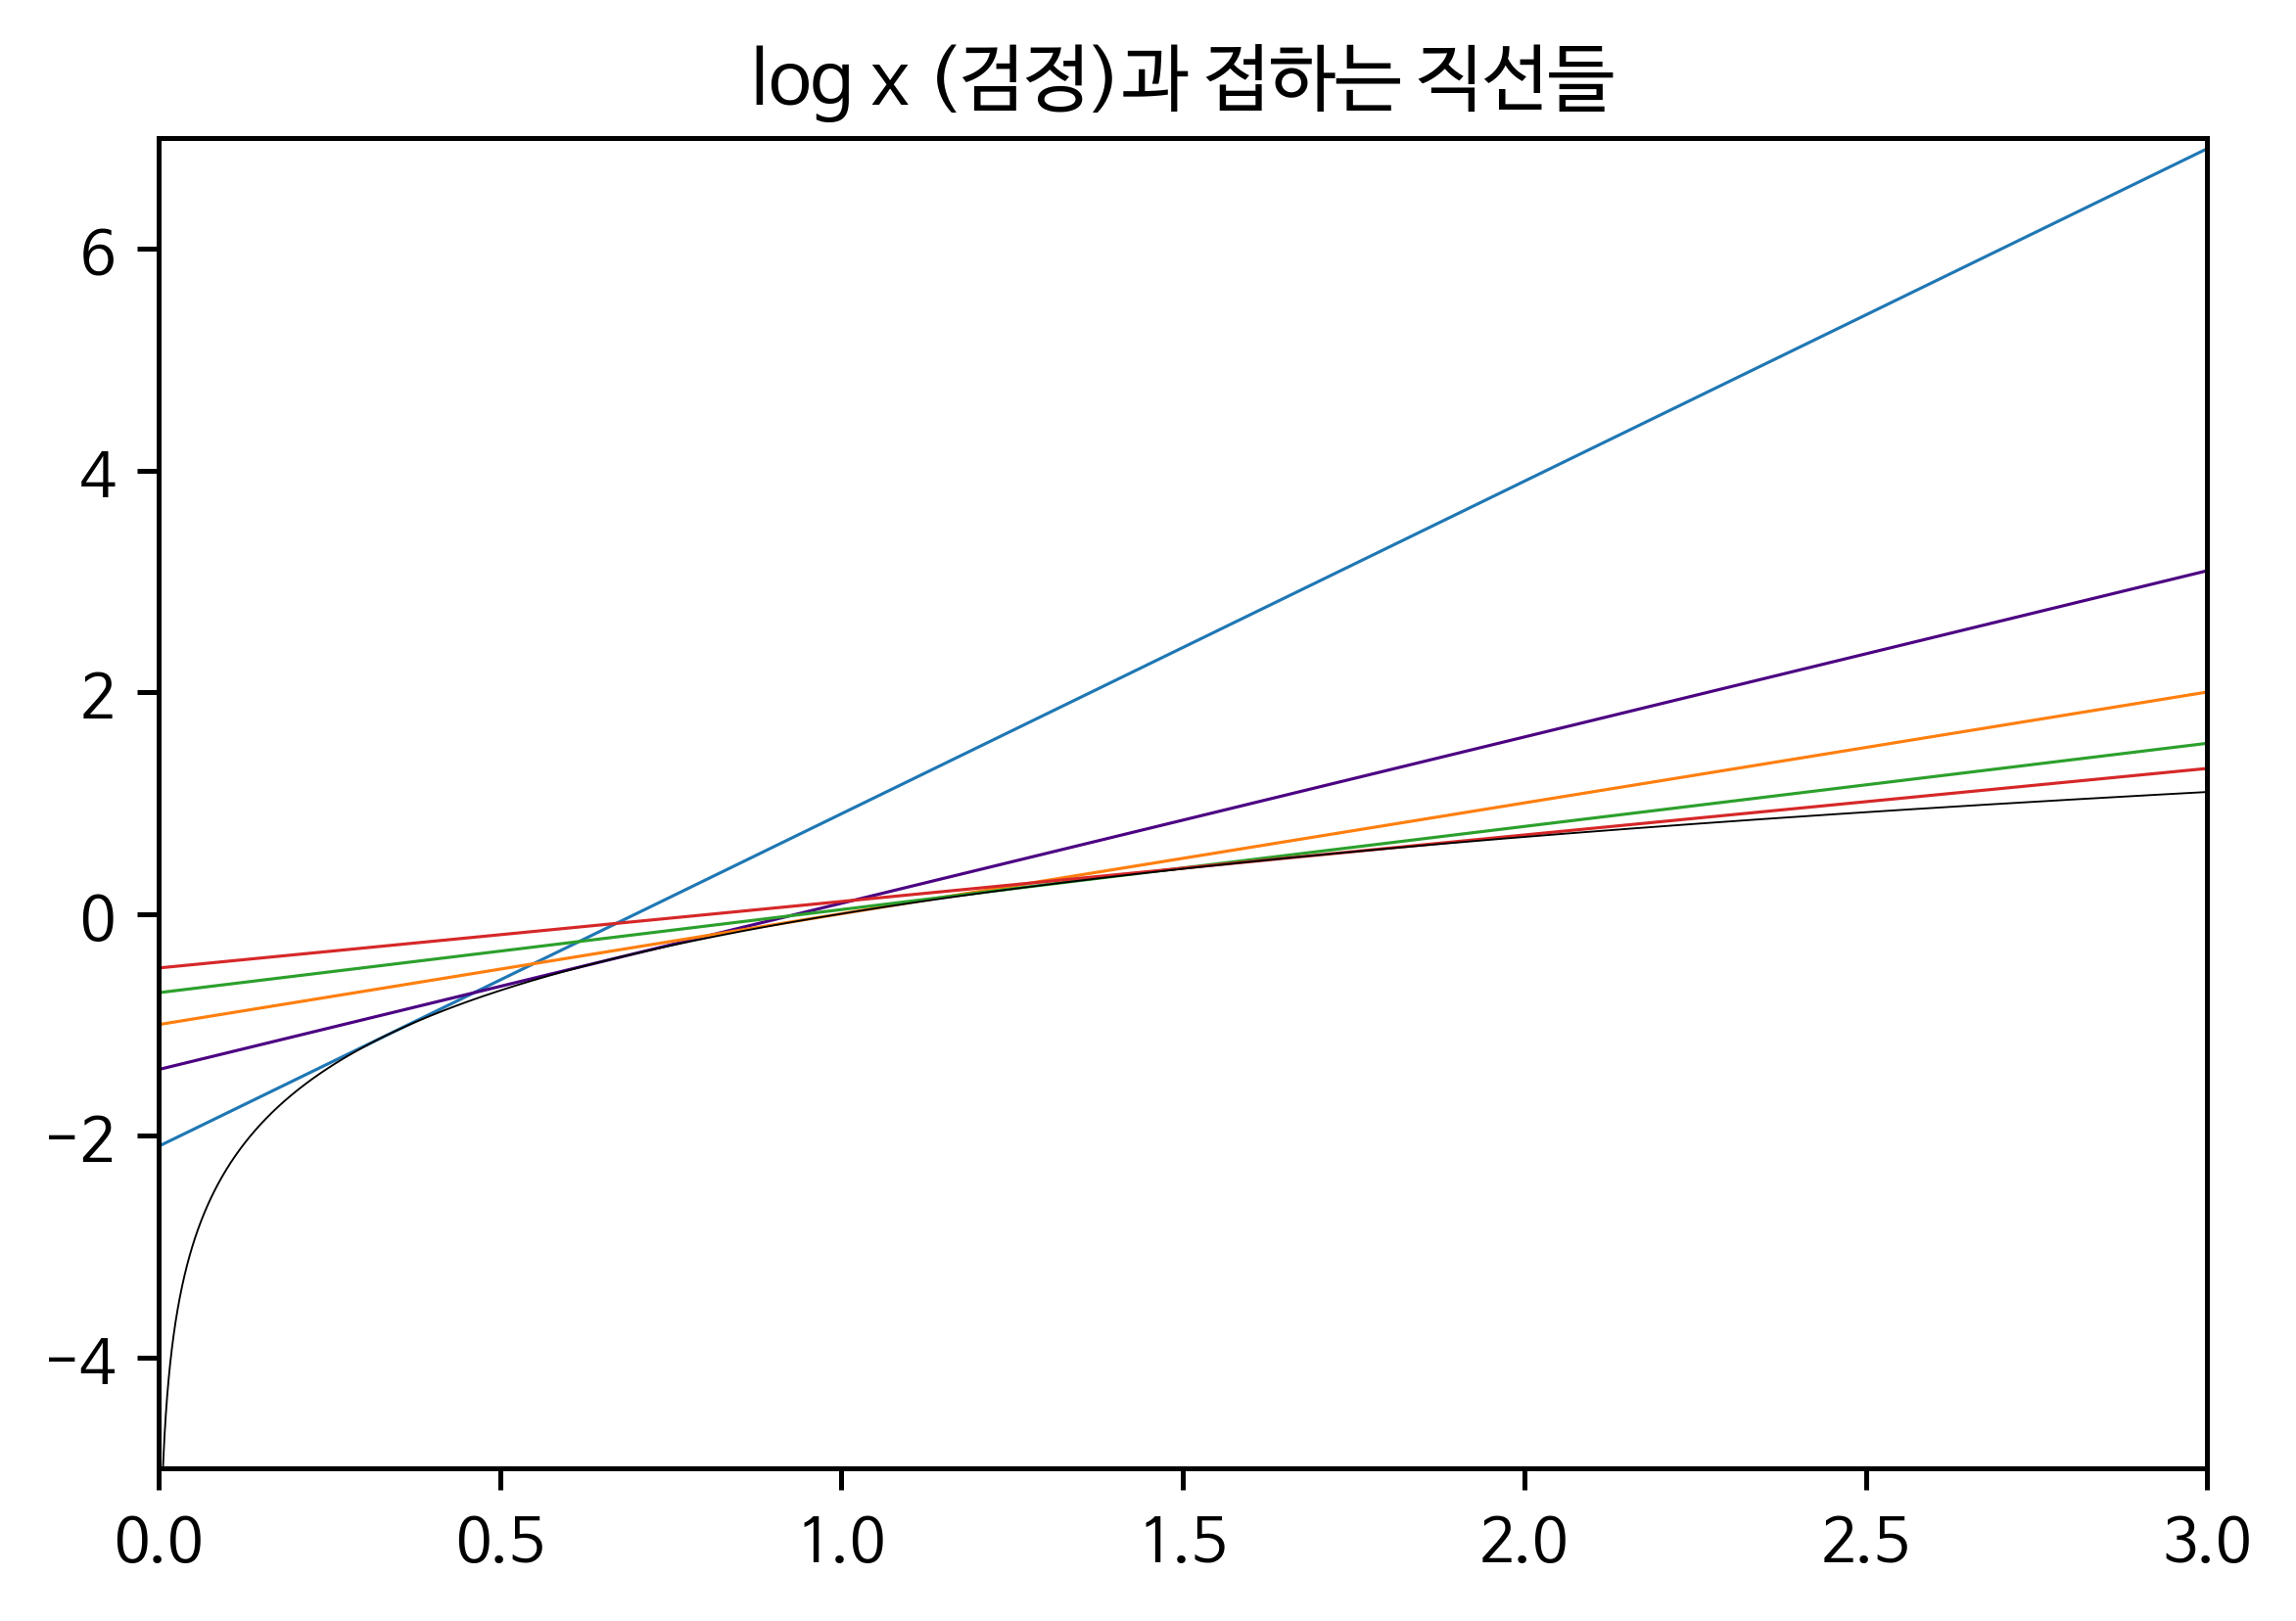

In [ ]:
x = np.linspace(1e-3, 7, 100000)
fig, ax = plt.subplots(1, 1)
ax.set_xlim(0,3)
ax.set_ylim(-5, 7)
for m in [6/(2 * n) for n in range(1,6)]:  # 기울기를 설정
    b = np.min(m*x - np.log(x))  # 기울기에 따른 절편을 계산
    print(m,b)
    if m==1.5:
        ax.plot(x, m*x - b, lw=0.5, color='indigo')
    else:
        ax.plot(x, m*x - b, lw=0.5)

ax.plot(x, np.log(x),color='k', lw=0.3)
plt.title("log x (검정)과 접하는 직선들")
plt.show()

3.0 2.098612290044736
1.5 1.405465108357257
1.0 1.000000000258563
0.75 0.7123179275743018
0.6 0.4891743763750329


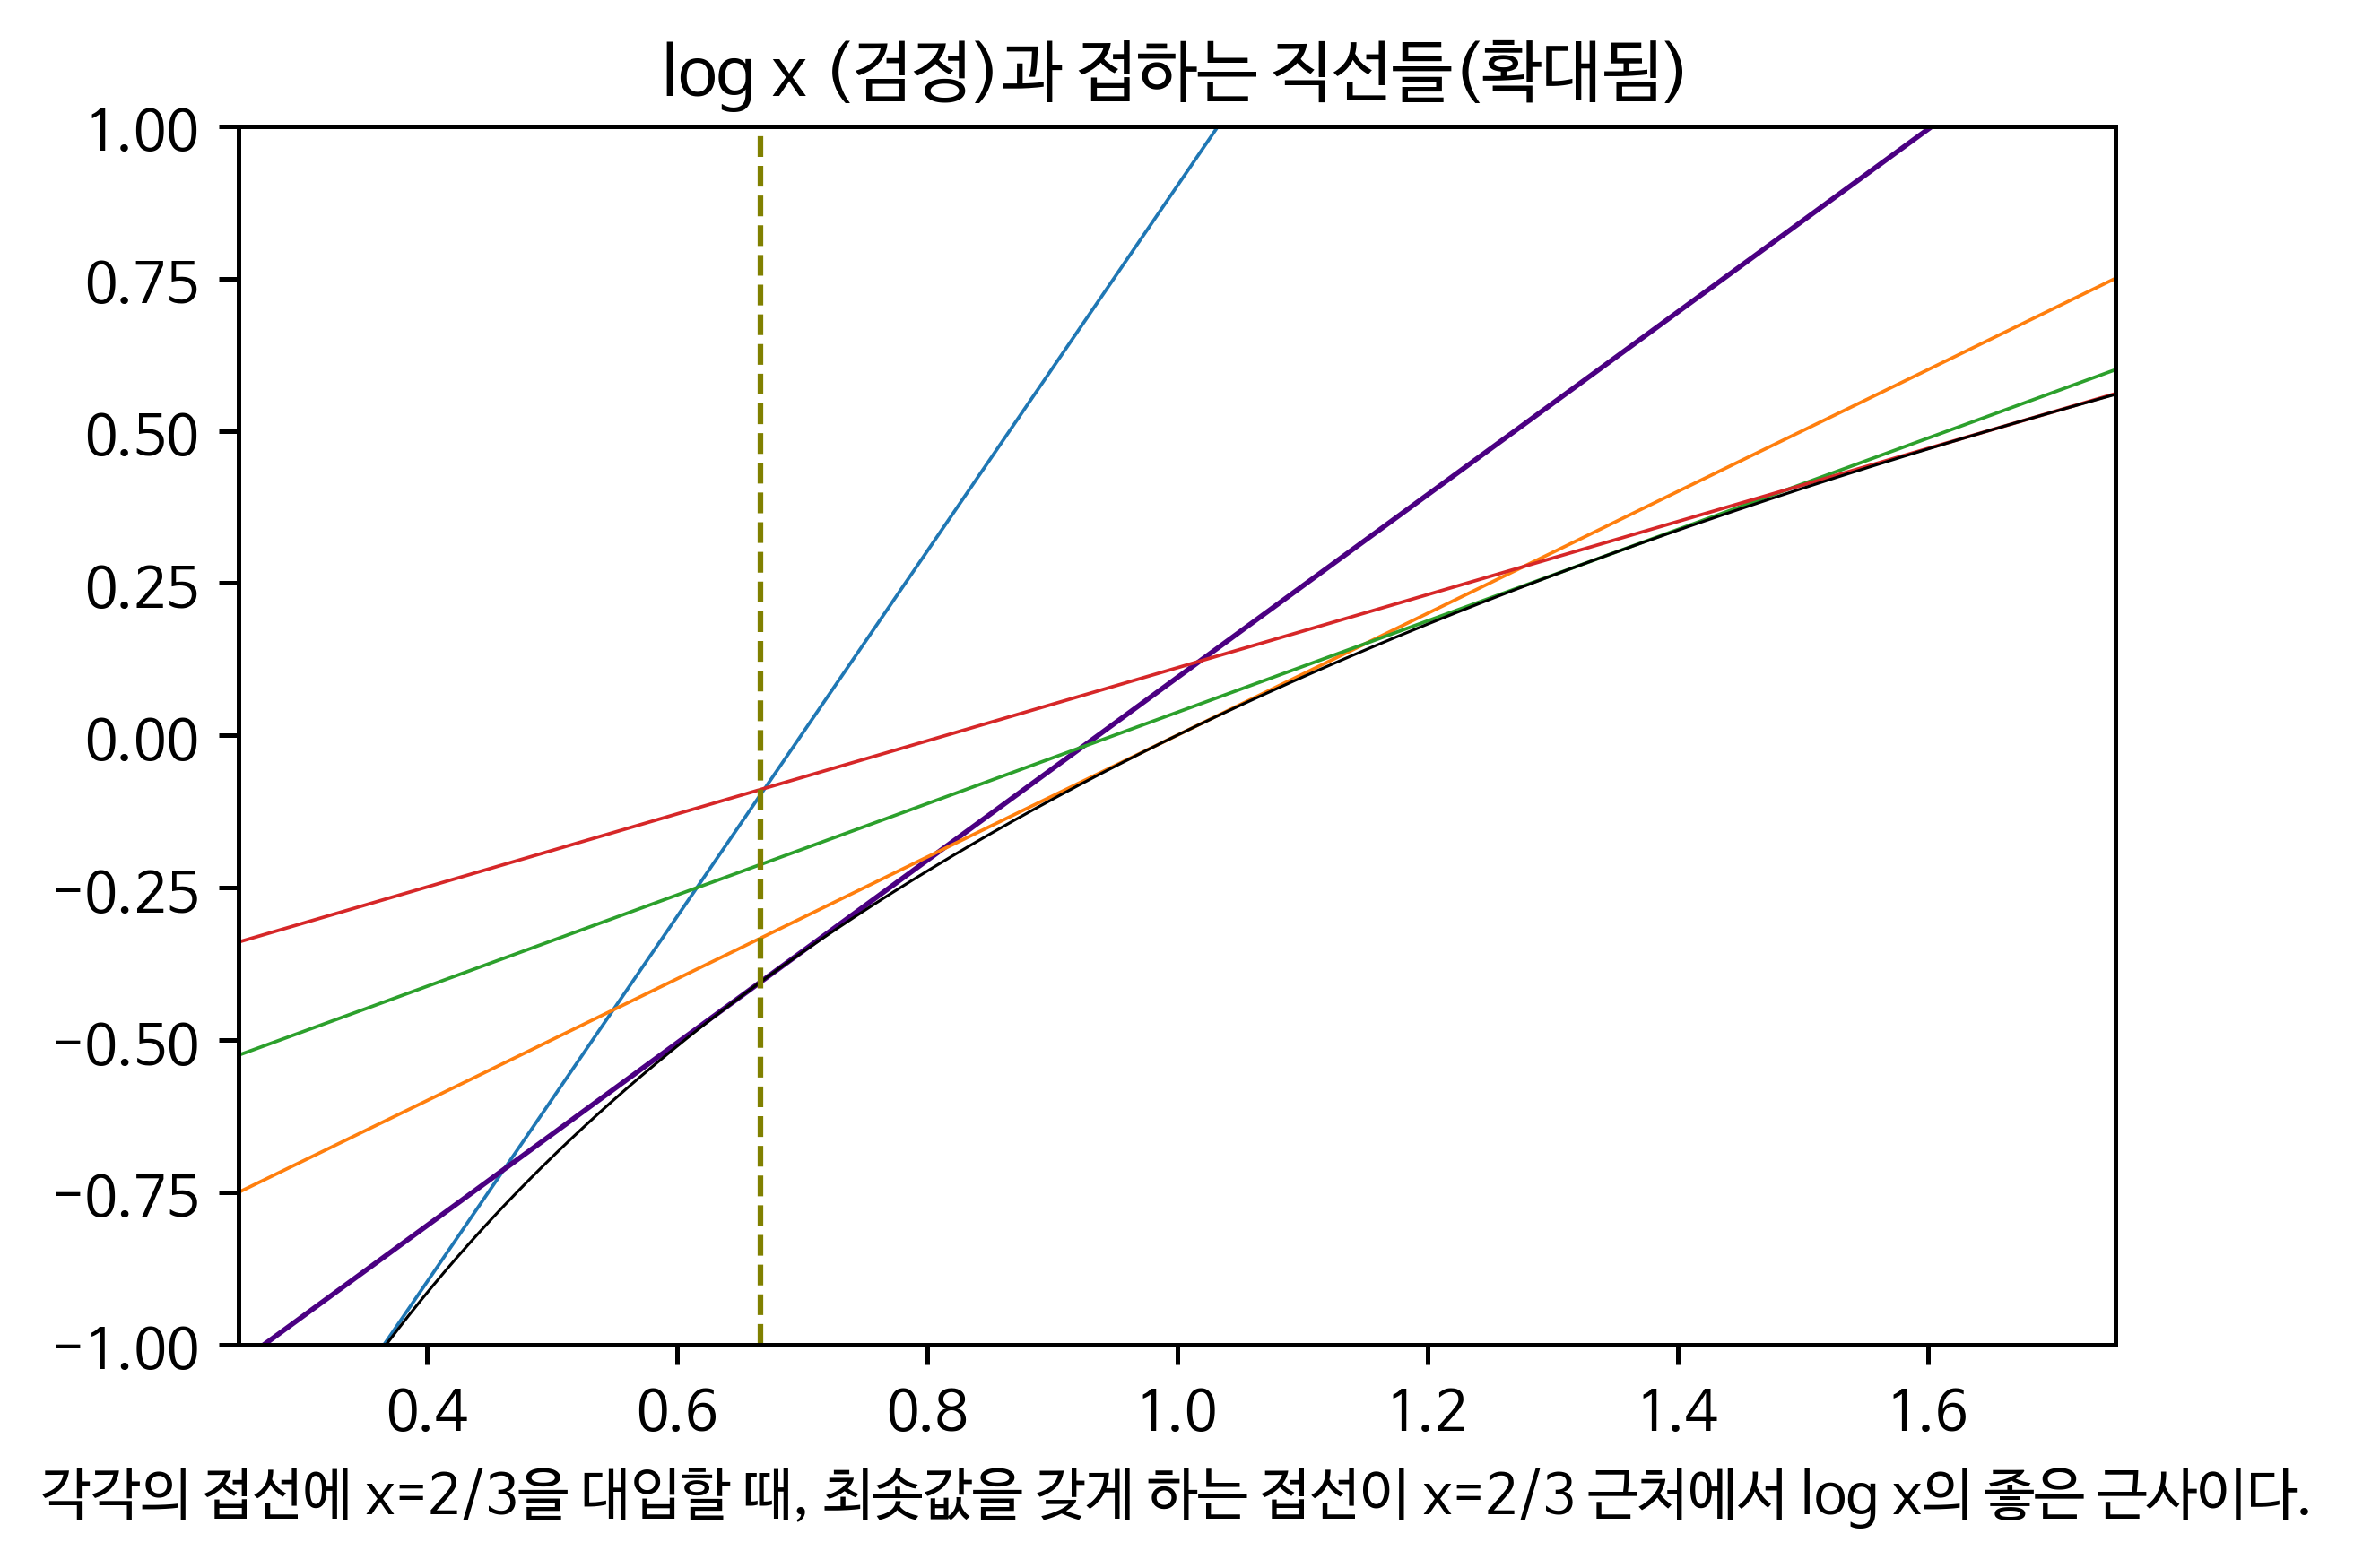

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(0.25,1.75)  # 확대하여 살펴본다
ax.set_ylim(-1, 1)
for m in [6/(2 * n) for n in range(1,6)]:
    k = np.min(m*x - np.log(x))
    print(m,k)
    if m==1.5:
        ax.plot(x, m*x - k, lw=0.9, color='indigo')
    else:
        ax.plot(x, m*x - k, lw=0.6)
ax.plot(x, np.log(x), lw=0.5, color='k')
ax.axvline(x=2/3, color='olive', lw=1, linestyle='--')
ax.set_xlabel("각각의 접선에 x=2/3을 대입할 때, 최솟값을 갖게 하는 접선이 x=2/3 근처에서 log x의 좋은 근사이다.")
plt.title("log x (검정)과 접하는 직선들(확대됨)")
plt.show()

# Variational Inference 예시

Beta 분포를 Gaussian으로 근사해 본다.

In [ ]:
def kld(q, p): 
    step = x[1] - x[0]
    q = np.clip(q, 1e-15, np.inf)
    p = np.clip(p, 1e-15, np.inf)
    return sum(q * np.log(q/p)) * step

In [ ]:
kld(beta_2_3, beta_8_2)

4.1245875617095065

In [177]:
from scipy.stats import beta

def plot_dist(at, m, std):
    # Evidence
    fig, ax = plt.subplots(2, 2, figsize = (16, 10))
    a, b = 2,3 
    x = np.linspace(0,
                    1, 100000, endpoint=False)
    beta_2_3 = beta.pdf(x,a,b)
    ax[0][0].plot(x, beta_2_3,
        'r-', lw=1.2, alpha=0.6)
    ax[0][0].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    ax[0][0].set_xlim(0,1)
    ax[0][0].set_ylim(bottom =0)
    ax[0][0].set_title("Evidence: P(X)= Beta(2,3)")
    ax[0][0].set_xlabel("X")

    # Posterior
    idx = np.where(x>at)[0][0]
    l, r = 10 +at*30, 10 
    beta_l_r = beta.pdf(x,l,r)
    ax[0][1].plot(x, beta_l_r,
        'g-', lw=1.2, alpha=0.6, label='beta pdf')
    ax[0][1].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    ax[0][1].set_xlim(0,1)
    ax[0][1].set_ylim(bottom =0)
    ax[0][1].set_title(f"Posterior: P(Z|X)= Beta({l},{r}) at X={at}")
    ax[0][1].set_xlabel("Z")

    # approximation
    ax[1][0].plot(x, beta_l_r,
        'g-', lw=1.2, alpha=0.8, label='beta pdf')


    norm_1 = norm.pdf(x,m,std)
    ax[1][0].plot(x, norm_1,
        'b-', lw=1.2, alpha=0.6, label=f'norm pdf, KLD(Q||P) = {kld(norm_1, beta_l_r):.3f}')
    ax[1][0].fill(x, norm_1, 'b', alpha = 0.1)
    ax[1][0].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    ax[1][0].set_xlim(0,1)
    ax[1][0].set_ylim(bottom =0)
    ax[1][0].set_title(f"Approximation: Q(Z|λ)= N({m}, {std}^2)")
    ax[1][0].set_xlabel("Z")
    ax[1][0].legend()

    ax[1][1].plot(x, beta_2_3,
        'r-', lw=1.2, alpha=0.6)
    ax[1][1].set_xticks([0,0.2,0.4,0.6,0.8,1.0])
    ax[1][1].set_xlim(0,1)
    ax[1][1].set_ylim(bottom =0)
    ax[1][1].set_title("Evidence: P(X)= Beta(2,3)")
    ax[1][1].set_xlabel("X")
    ax[1][1].vlines(at, ymin=0, ymax=beta_2_3[idx] -kld(norm_1, beta_l_r), label = f'ELBO = {beta_2_3[idx] -kld(norm_1, beta_l_r):.3f}' )
    ax[1][1].vlines(at, ymin=beta_2_3[idx] -kld(norm_1, beta_l_r), ymax=beta_2_3[idx],label = f'KLD = {kld(norm_1, beta_l_r):.3f}', color='m' )
    ax[1][1].legend()
    plt.show()

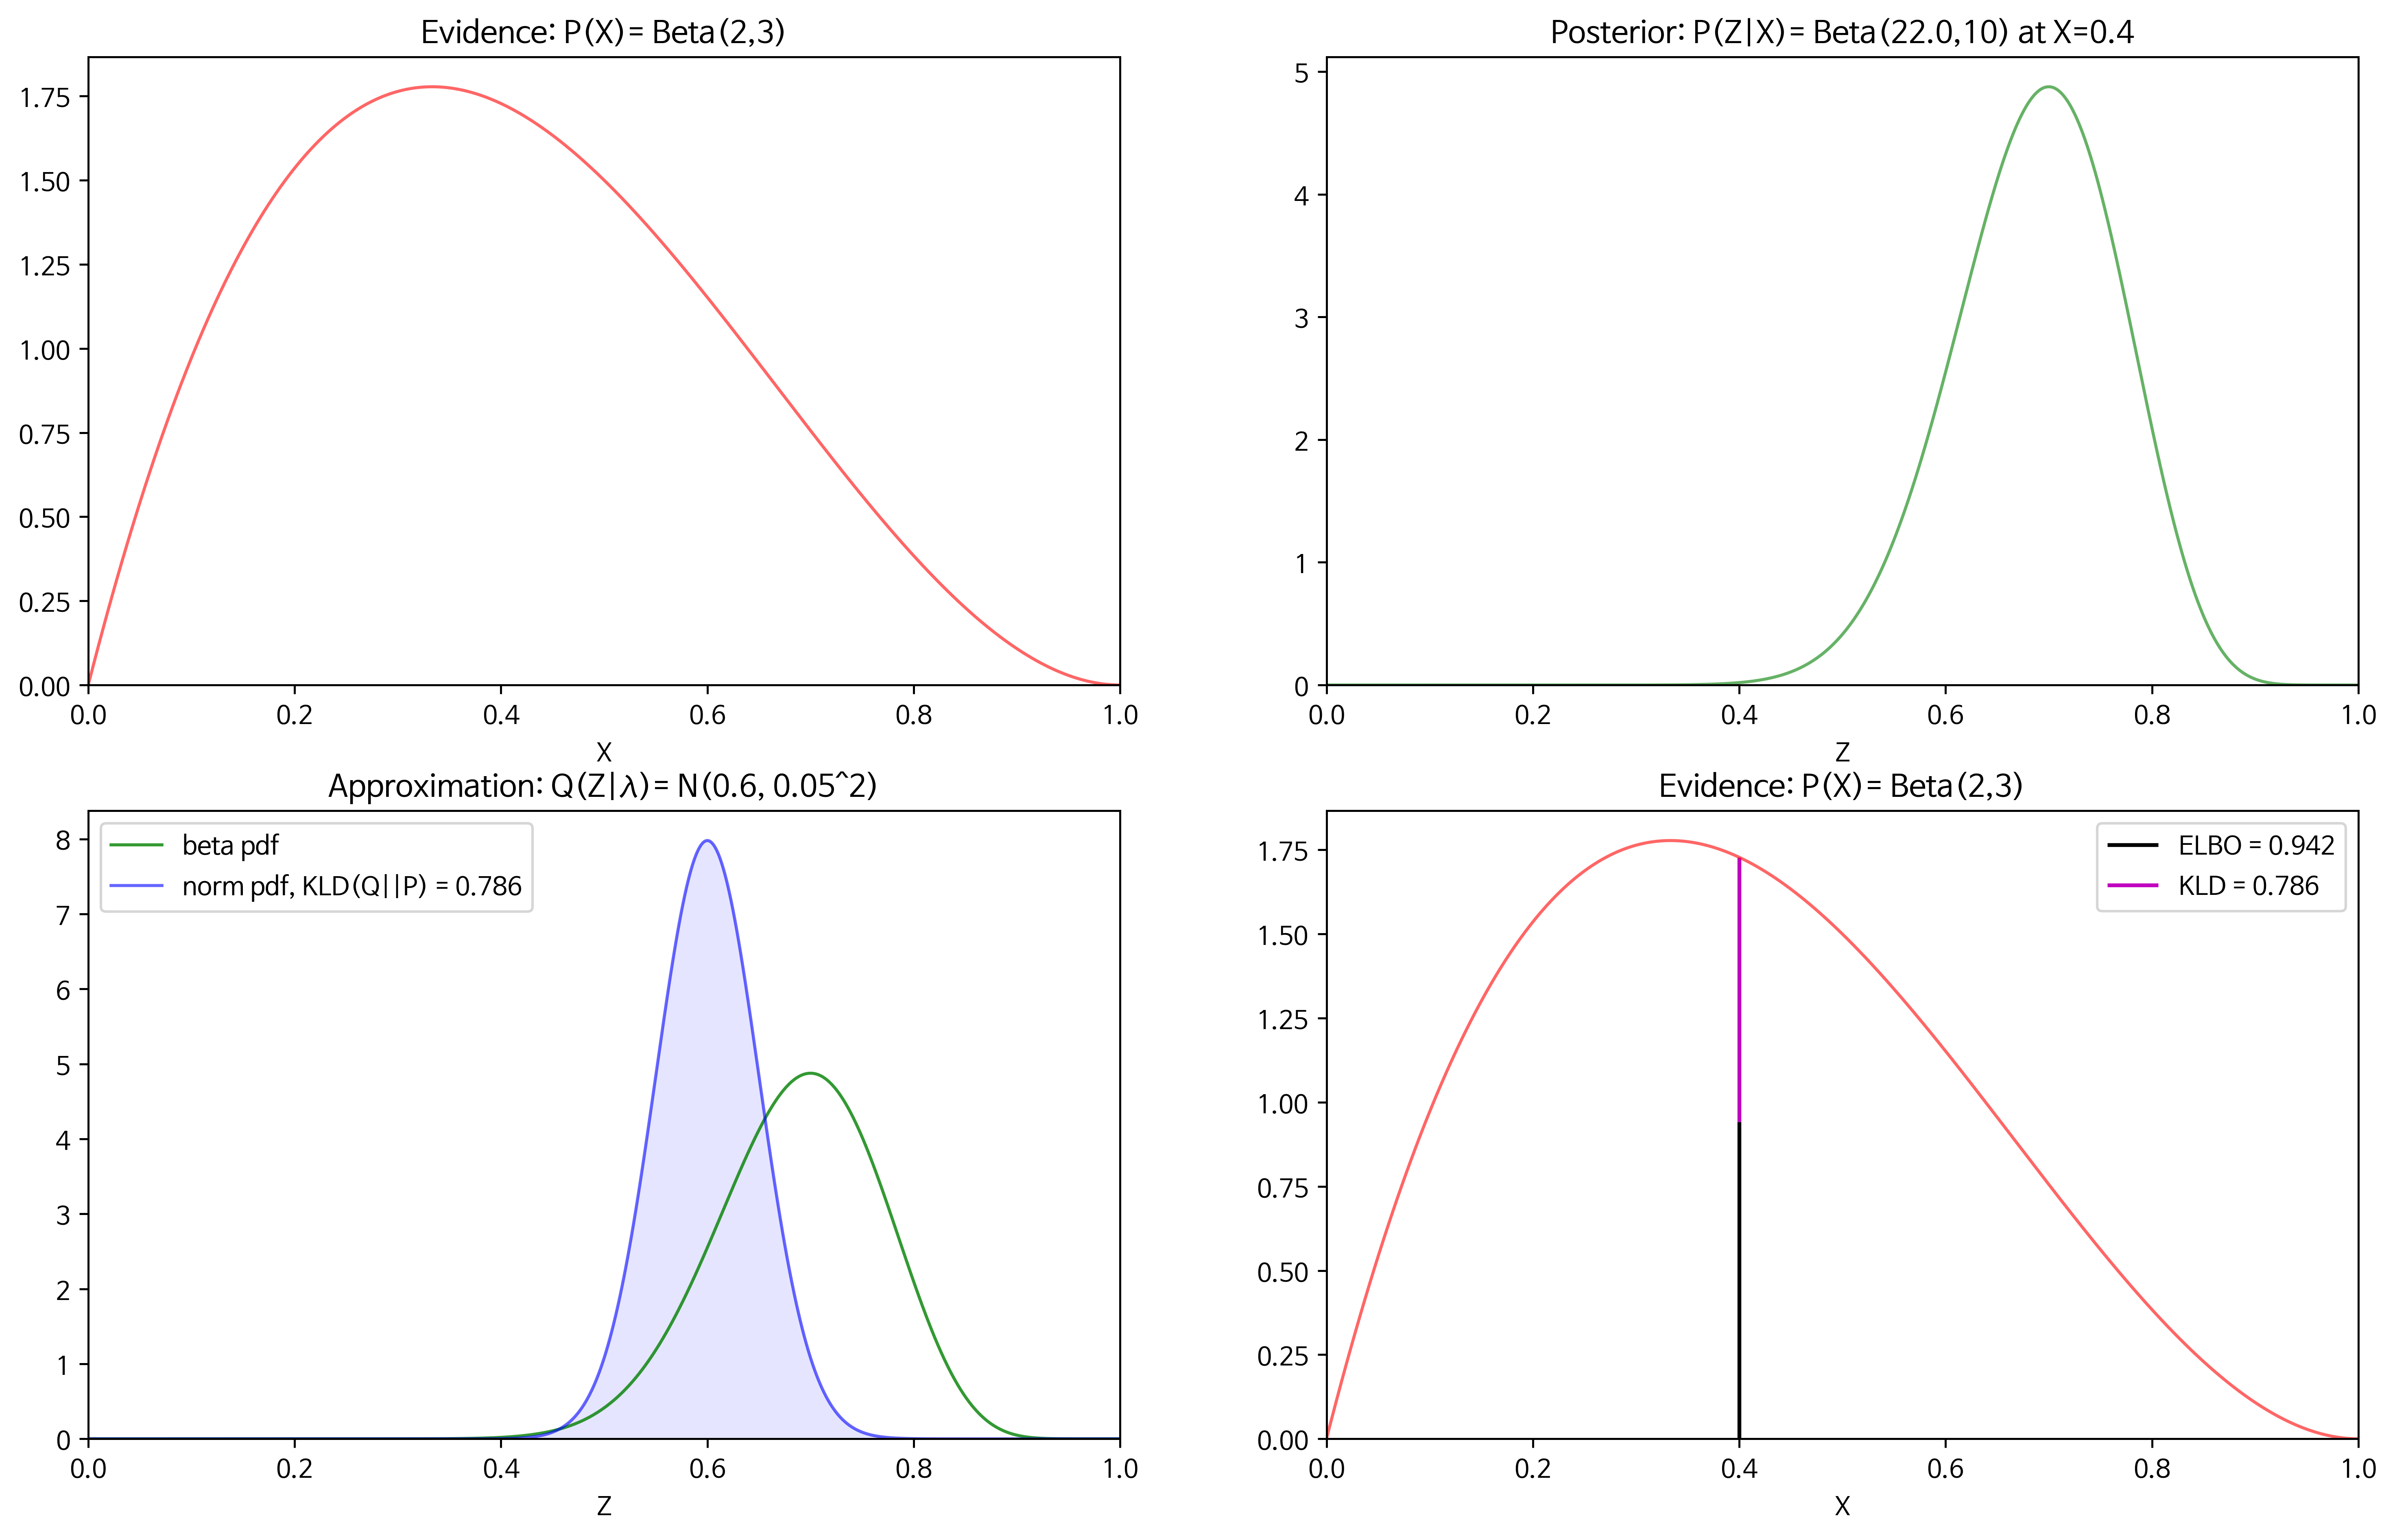

In [178]:
plot_dist(0.4, 0.6, 0.05)

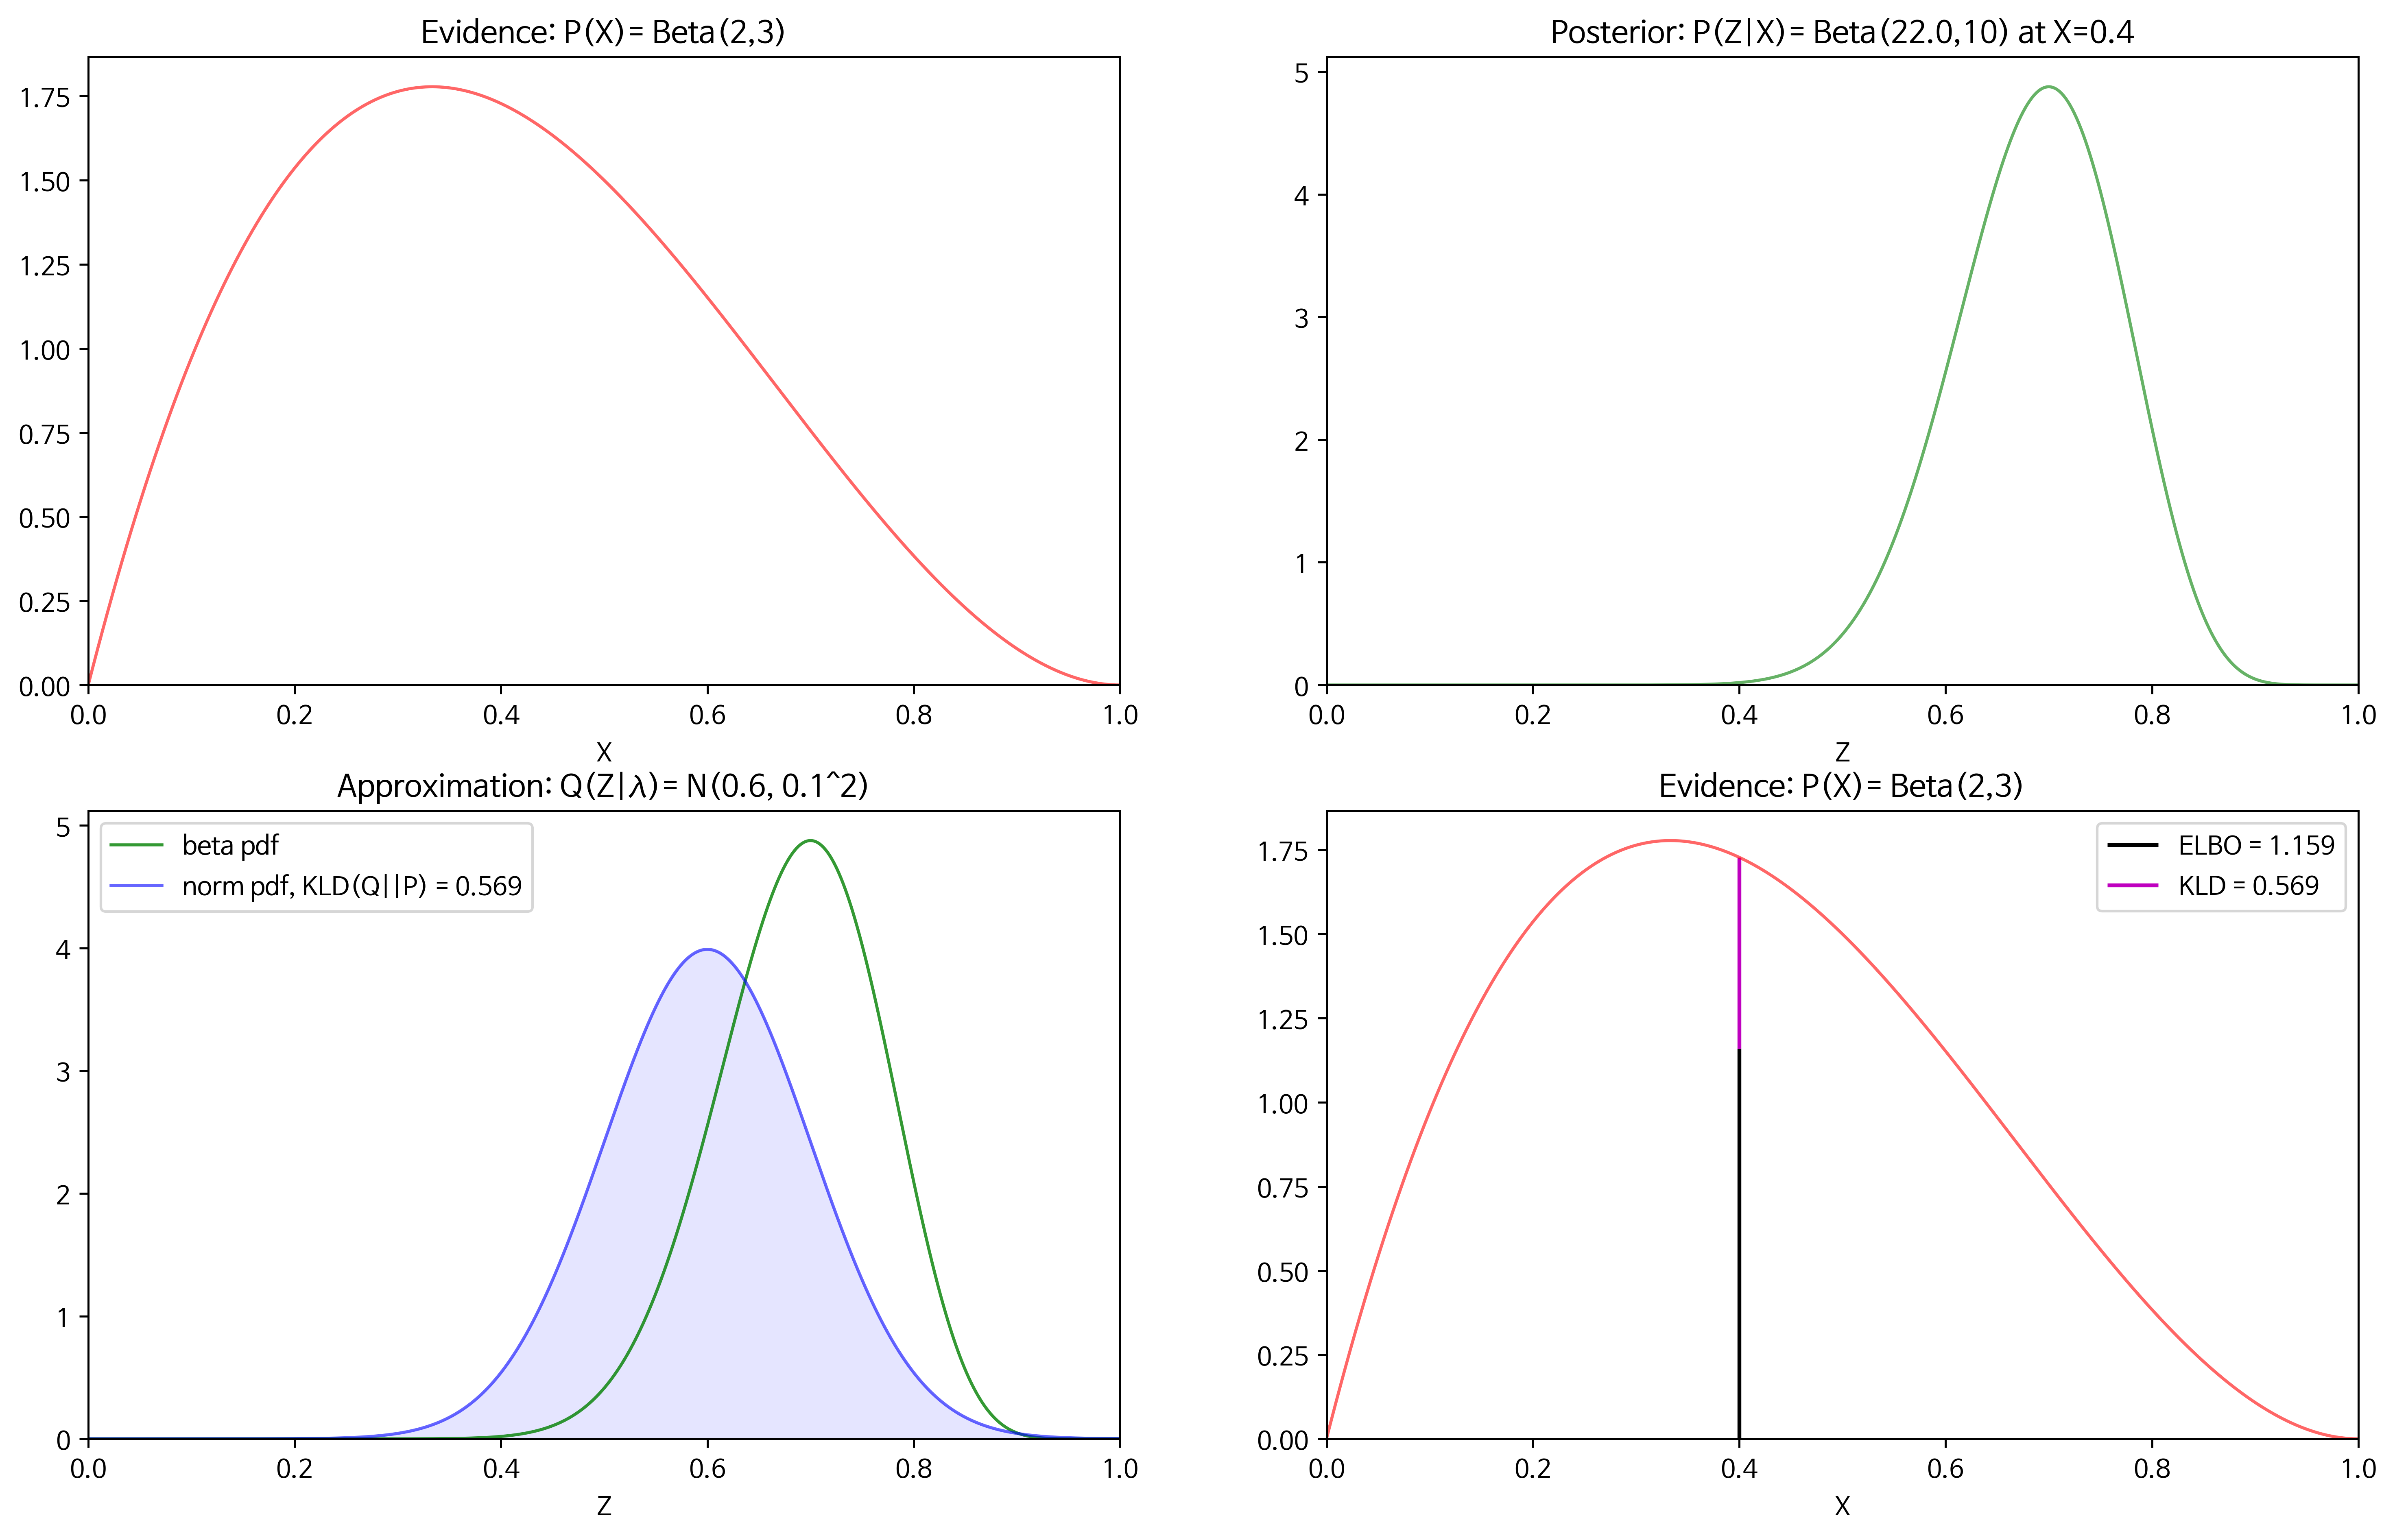

In [179]:
plot_dist(0.4, 0.6, 0.10)

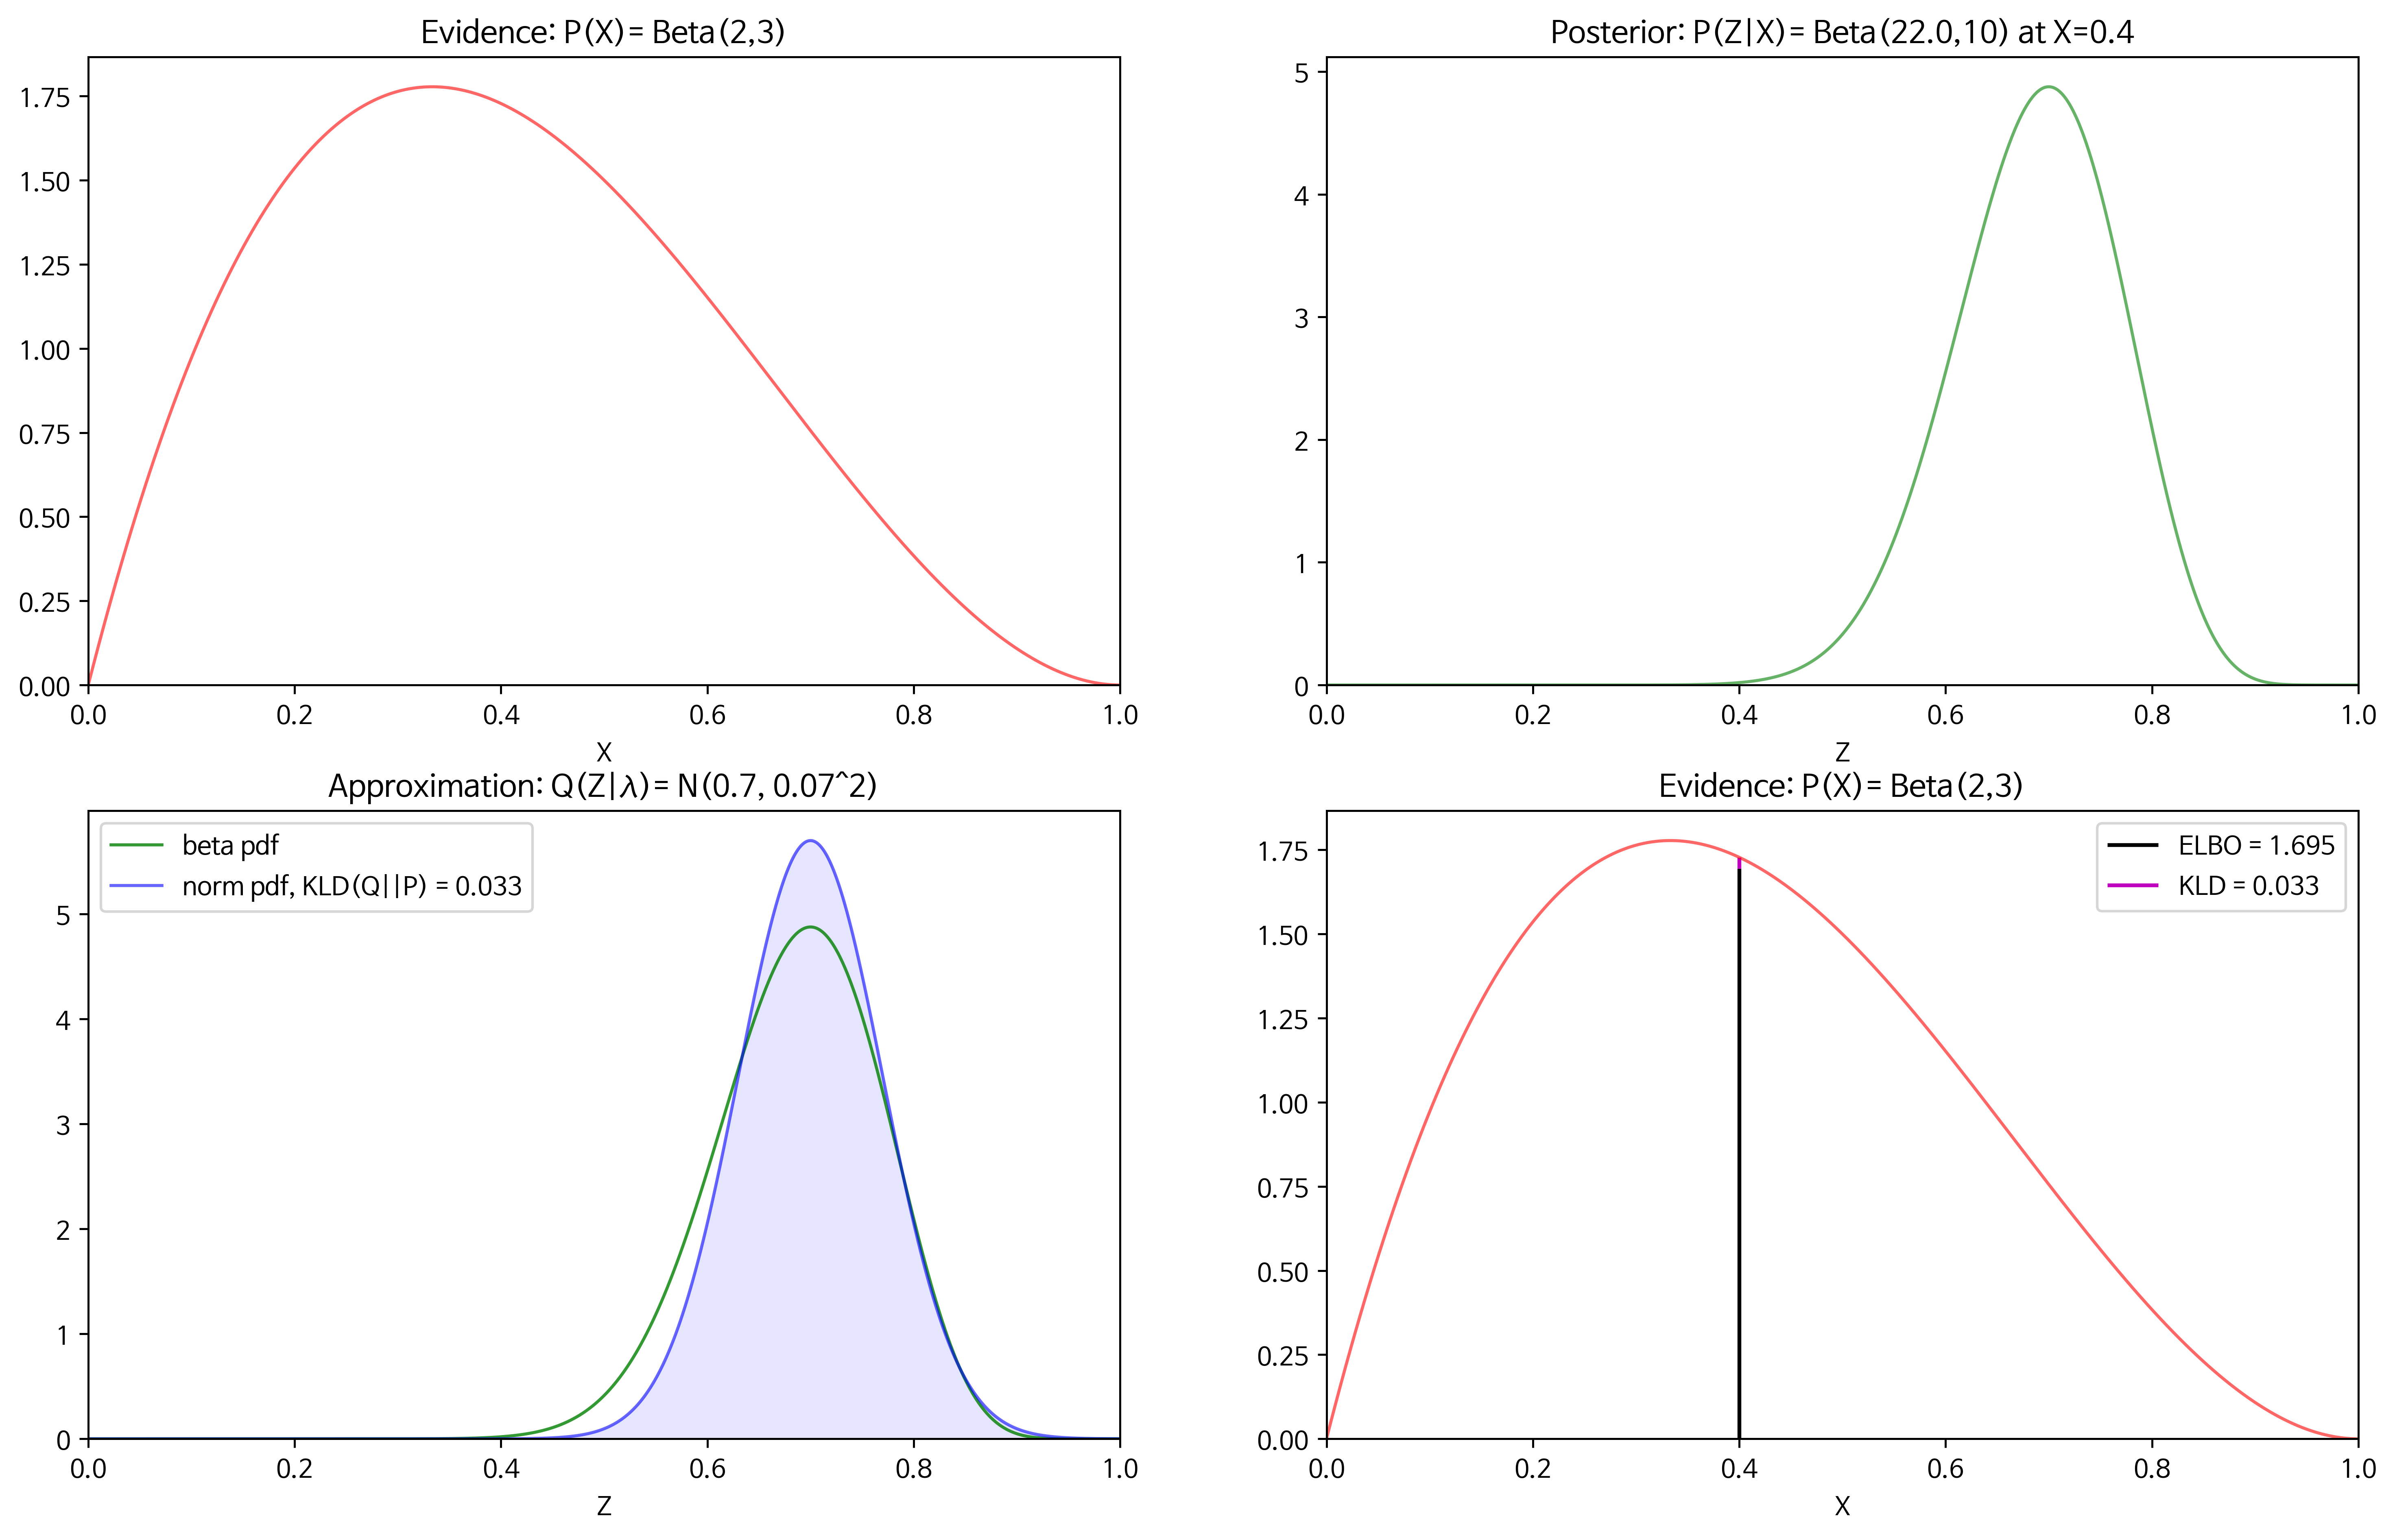

In [180]:
plot_dist(0.4, 0.7, 0.07)

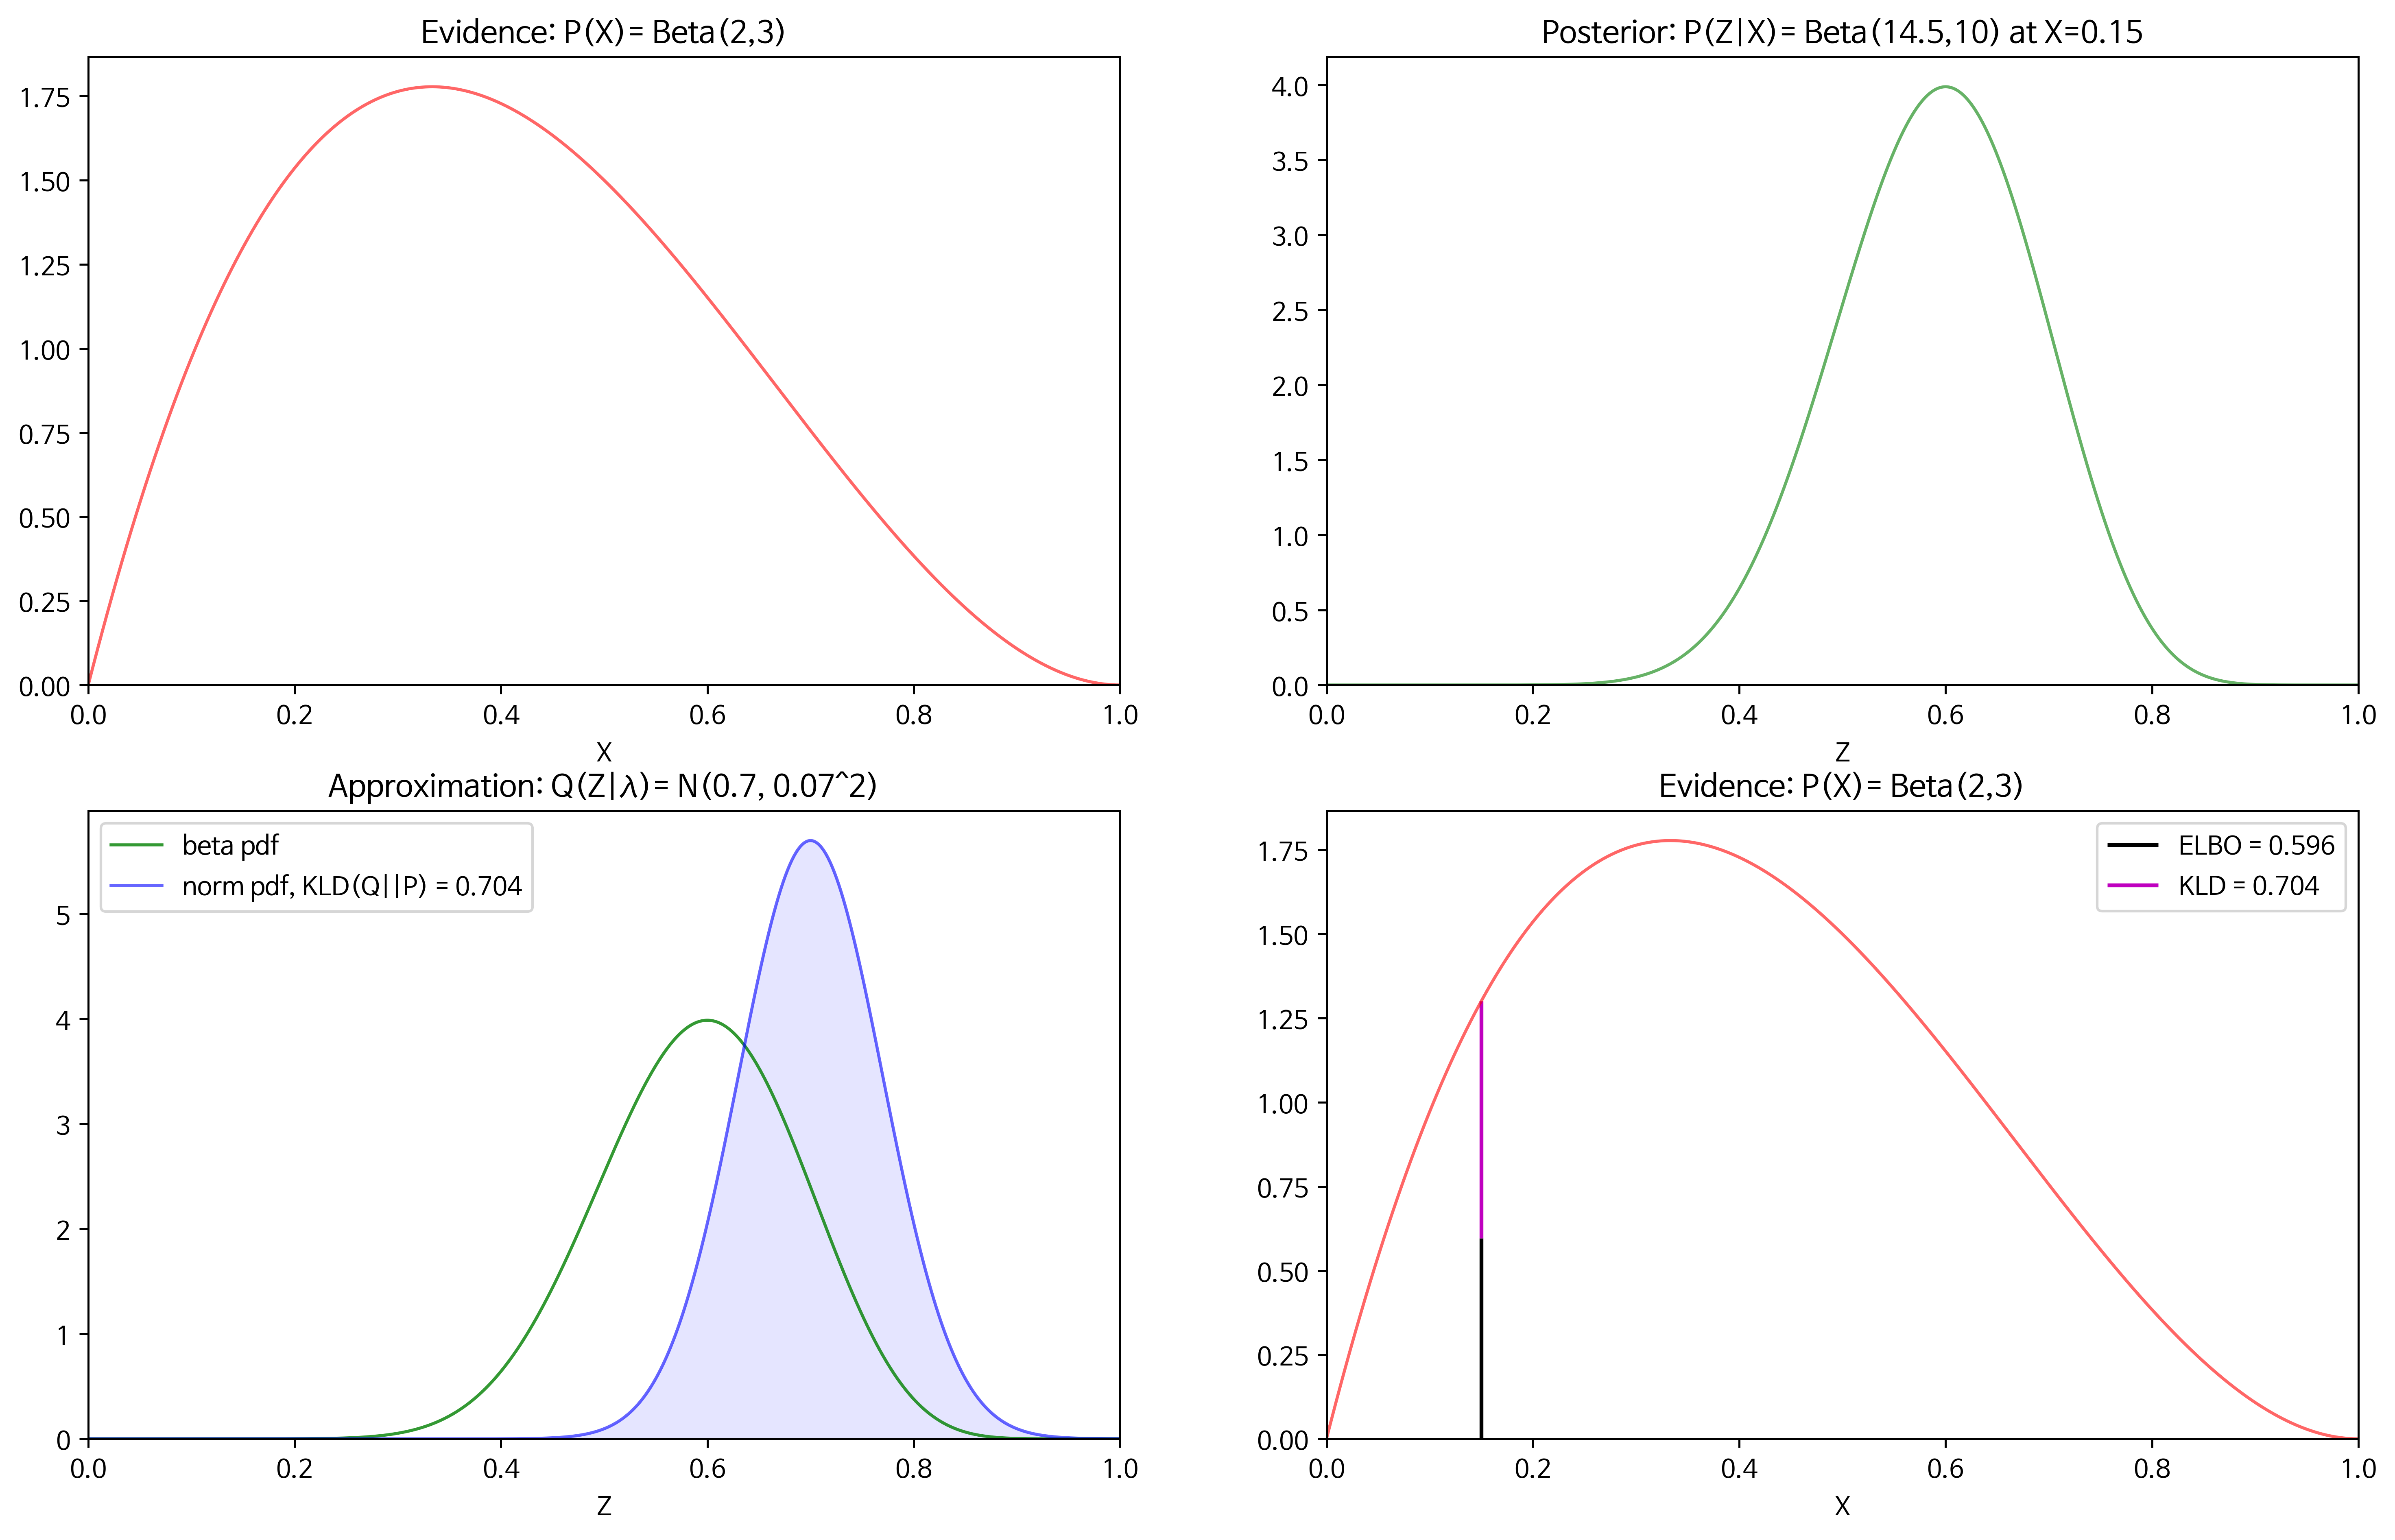

In [183]:
plot_dist(0.15, 0.7, 0.07)